In [1]:
import pandas as pd
import numpy as np

In [2]:
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose


In [3]:
# Read the JSON file
data = pd.read_json('failuretime.json')


In [4]:
data.head(3)

,time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37


In [5]:
# Convert timestamps to datetime
data['timestamp'] = pd.to_datetime(data['time'])

# Set timestamp as the index
data.set_index('timestamp', inplace=True)

# Resample the data into 15-minute intervals and count failures
failures_count = data.resample('15T').count()

In [6]:
failures_count

,time
timestamp,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [7]:
start_date = '1970-01-02'
end_date = '1970-01-03'

In [8]:
subset_df = failures_count[(failures_count.index >= start_date) & (failures_count.index <= end_date)]

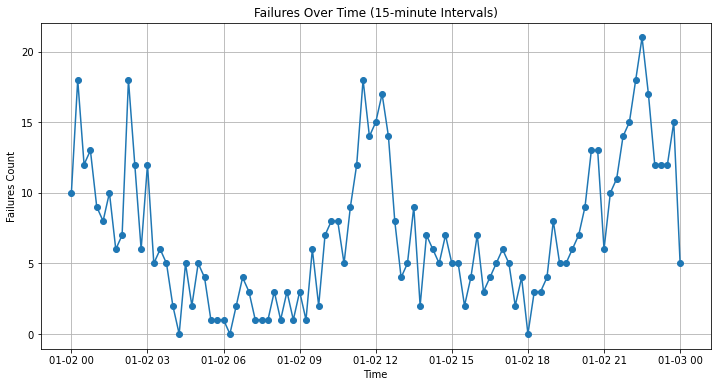

In [9]:
import matplotlib.pyplot as plt

# Plot the time-series data
plt.figure(figsize=(12, 6))
plt.plot(subset_df.index, subset_df['time'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Failures Count')
plt.title('Failures Over Time (15-minute Intervals)')
plt.grid(True)
plt.show()

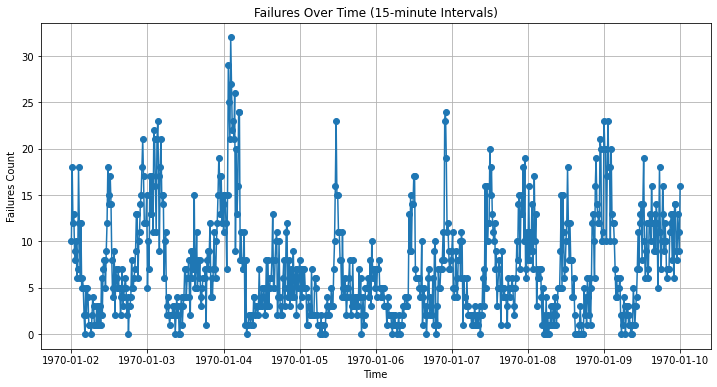

In [10]:
start_date = '1970-01-02'
end_date = '1970-01-10'
subset_df = failures_count[(failures_count.index >= start_date) & (failures_count.index <= end_date)]
import matplotlib.pyplot as plt

# Plot the time-series data
plt.figure(figsize=(12, 6))
plt.plot(subset_df.index, subset_df['time'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Failures Count')
plt.title('Failures Over Time (15-minute Intervals)')
plt.grid(True)
plt.show()

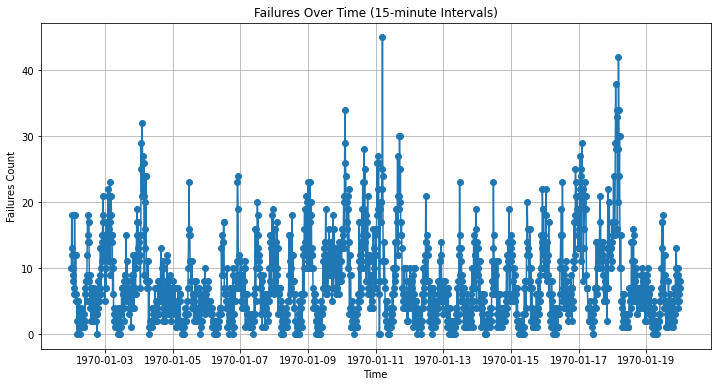

In [11]:
start_date = '1970-01-02'
end_date = '1970-01-20'
subset_df = failures_count[(failures_count.index >= start_date) & (failures_count.index <= end_date)]
import matplotlib.pyplot as plt

# Plot the time-series data
plt.figure(figsize=(12, 6))
plt.plot(subset_df.index, subset_df['time'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Failures Count')
plt.title('Failures Over Time (15-minute Intervals)')
plt.grid(True)
plt.show()

<Figure size 1440x432 with 0 Axes>

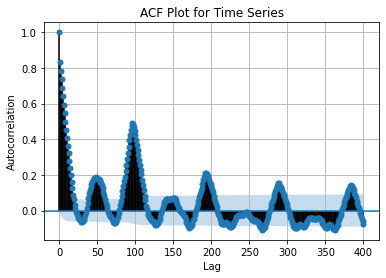

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
# Create the ACF plot
plt.figure(figsize=(20, 6))
plot_acf(failures_count['time'], lags=400) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot for Time Series')
plt.grid(True)
plt.show()


<Figure size 1440x432 with 0 Axes>

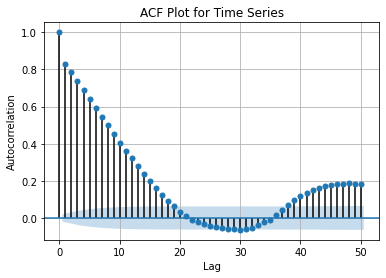

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
# Create the ACF plot
plt.figure(figsize=(20, 6))
plot_acf(failures_count['time'], lags=50) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot for Time Series')
plt.grid(True)
plt.show()


<Figure size 720x432 with 0 Axes>

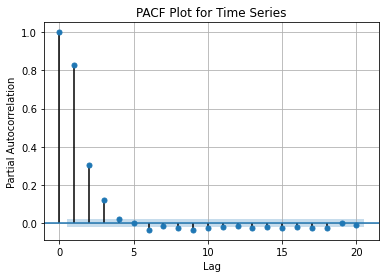

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
# Create the PACF plot
plt.figure(figsize=(10, 6))
plot_pacf(failures_count['time'], lags=20)  
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF Plot for Time Series')
plt.grid(True)
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller, kpss


# Function to perform KPSS test for stationarity
def kpss_test(timeseries):
    result = kpss(timeseries)
    print("\nKPSS Test Results:")
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Lags Used: {result[2]}')
    print(f'Critical Values:')
    for key, value in result[3].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print("Non-stationary (Reject the null hypothesis)")
    else:
        print("Stationary (Fail to reject the null hypothesis)")

# Perform KPSS tests
kpss_test(failures_count['time'])



KPSS Test Results:
KPSS Statistic: 2.9895998153342584
p-value: 0.01
Lags Used: 38
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
Non-stationary (Reject the null hypothesis)


C:\Users\nahar\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\nahar\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


## First order Differencing 

In [16]:
failures_count['first_difference'] = failures_count.time - failures_count.time.shift(1)  
kpss_test(failures_count['first_difference'].dropna())



KPSS Test Results:
KPSS Statistic: 0.0030984841843458614
p-value: 0.1
Lags Used: 38
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
Stationary (Fail to reject the null hypothesis)


C:\Users\nahar\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [17]:
failures_count.head(10)

,time,first_difference
timestamp,,
1970-01-01 20:00:00,2,NaN
1970-01-01 20:15:00,6,4.0
1970-01-01 20:30:00,9,3.0
1970-01-01 20:45:00,7,-2.0
1970-01-01 21:00:00,1,-6.0
1970-01-01 21:15:00,4,3.0
1970-01-01 21:30:00,0,-4.0
1970-01-01 21:45:00,4,4.0
1970-01-01 22:00:00,9,5.0


## ACF and PACF plot of differenced time series

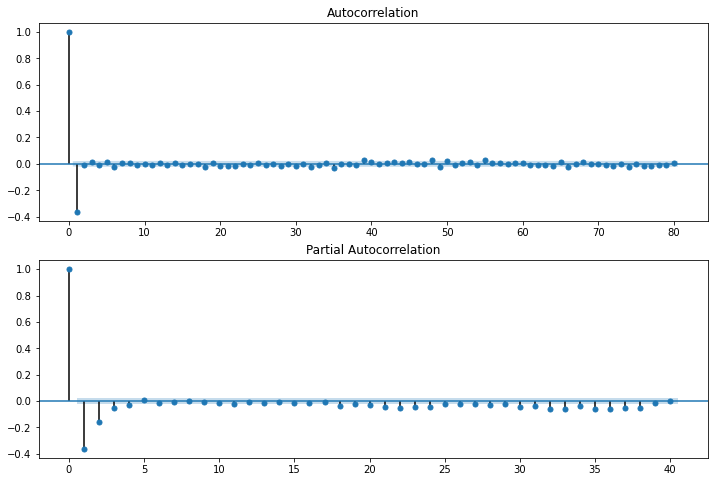

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(failures_count.first_difference.iloc[2:], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(failures_count.first_difference.iloc[2:], lags=40, ax=ax2)

## Model building

In [20]:
from statsmodels.tsa.arima_model import ARIMA

# Fit the ARIMA model
model = ARIMA(failures_count.time, order=(4,1, 1))  

model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.time   No. Observations:                 9787
Model:                 ARIMA(4, 1, 1)   Log Likelihood              -28354.520
Method:                       css-mle   S.D. of innovations              4.384
Date:                Thu, 26 Oct 2023   AIC                          56723.040
Time:                        05:35:11   BIC                          56773.361
Sample:                    01-01-1970   HQIC                         56740.091
                         - 04-13-1970                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0006      0.000      3.839      0.000       0.000       0.001
ar.L1.D.time     0.5393      0.010     53.359      0.000       0.519       0.559
ar.L2.D.time     0.2284      0.011     19.97

In [21]:
failures_count.shape

(9788, 2)

## Prediction

In [22]:
forecast_steps = 4  # Number of future periods to forecast
forecast, stderr, conf_int = model_fit.forecast(steps=forecast_steps)

In [23]:
forecast

array([6.45382743, 6.93548553, 7.29684217, 7.62894752])

In [24]:
stderr, conf_int

(array([4.38384957, 4.98071806, 5.47618501, 5.91274609]),
 array([[-2.13835983, 15.0460147 ],
        [-2.82654249, 16.69751355],
        [-3.43628322, 18.02996756],
        [-3.95982186, 19.21771691]]))

In [25]:
failures_count.shape

(9788, 2)

## Plotting the original data, the forecast


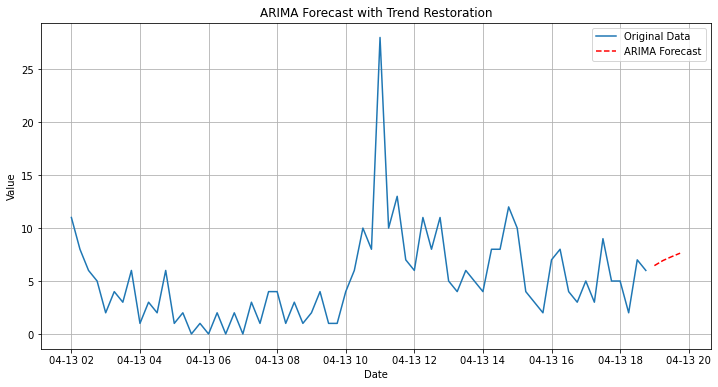

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(failures_count.iloc[9720:9791].index, failures_count.iloc[9720:9791]['time'], label='Original Data')
plt.plot(pd.date_range(start=failures_count.index[-1], periods=forecast_steps + 1, freq='15T')[1:], forecast, label='ARIMA Forecast', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Forecast with Trend Restoration')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
# start_date = '1970-01-02'
# end_date = '1970-01-10'
# subset_df = failures_count[(failures_count.index >= start_date) & (failures_count.index <= end_date)]


# mod = sm.tsa.statespace.SARIMAX(subset_df.time, trend='n', order=(4,1,1), seasonal_order=(4,1,1,50))
# results = mod.fit()
# print(results.summary())
